In [1]:
#import libraries

from numpy import sqrt, pi, exp, linspace, loadtxt

#lmfit provides curve fiting using non-linear least squares minimization
#lmfit was developed by Matt Newville: https://github.com/newville

#install lmfit

#uncomment the following lines to install lmfit

# from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])

#!pip install lmfit
from lmfit.models import GaussianModel, LinearModel, ConstantModel
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import matplotlib.lines as mlines

%matplotlib inline 

In [2]:
#import the data
#The data was cleaned and prepared using external spreadsheet applications
#The data includes estimated errors based on instruments' accuracy
data = loadtxt('./Data/xyp_and_yerr.dat')
x = data[:, 0]
y = data[:, 1]
yerr = data[:, 2]

In [3]:
#define the aggregate model

mod = GaussianModel(prefix='g1_') + \
      GaussianModel(prefix='g2_') + \
      LinearModel(prefix='l1_') + \
      GaussianModel(prefix='g3_') + \
      LinearModel(prefix='l2_') + \
      GaussianModel(prefix='g4_') + \
ConstantModel()

In [4]:
#assign initial parameters

pars  = mod.make_params(g1_amplitude=0.229, g1_center=2.682, g1_sigma=0.2985,
                        g2_amplitude=0.489, g2_center=3.813, g2_sigma=0.2573,
                        l1_m=0, l1_b=0.060,
                        g3_amplitude=0.389, g3_center=6.632, g3_sigma=0.2484,
                        l2_m=0, l2_b=0.090,
                        g4_amplitude=0.213, g4_center=9.017, g4_sigma=0.2705,
                        c=0.0)

In [5]:
# fit with weights=1/yerr
result = mod.fit(y, pars, x=x, weights=1./yerr)

In [6]:
#print the Fit Statistics and parameters

print(result.fit_report())



[[Model]]
    ((((((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(linear, prefix='l1_')) + Model(gaussian, prefix='g3_')) + Model(linear, prefix='l2_')) + Model(gaussian, prefix='g4_')) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 166
    # data points      = 2389
    # variables        = 17
    chi-square         = 2372.70752
    reduced chi-square = 1.00029828
    Akaike info crit   = 17.6517113
    Bayesian info crit = 115.888424
    R-squared          = -83.2059135
[[Variables]]
    g1_amplitude:  0.13550246 +/- 4.9021e-04 (0.36%) (init = 0.229)
    g1_center:     2.66534384 +/- 0.00108722 (0.04%) (init = 2.682)
    g1_sigma:      0.27850756 +/- 0.00100364 (0.36%) (init = 0.2985)
    g2_amplitude:  0.28023255 +/- 7.9596e-04 (0.28%) (init = 0.489)
    g2_center:     3.82677897 +/- 7.0173e-04 (0.02%) (init = 3.813)
    g2_sigma:      0.24921413 +/- 6.0701e-04 (0.24%) (init = 0.2573)
    l1_slope:      1331.67

In [7]:
#extract parameters
comps = result.eval_components(result.params, x=x)


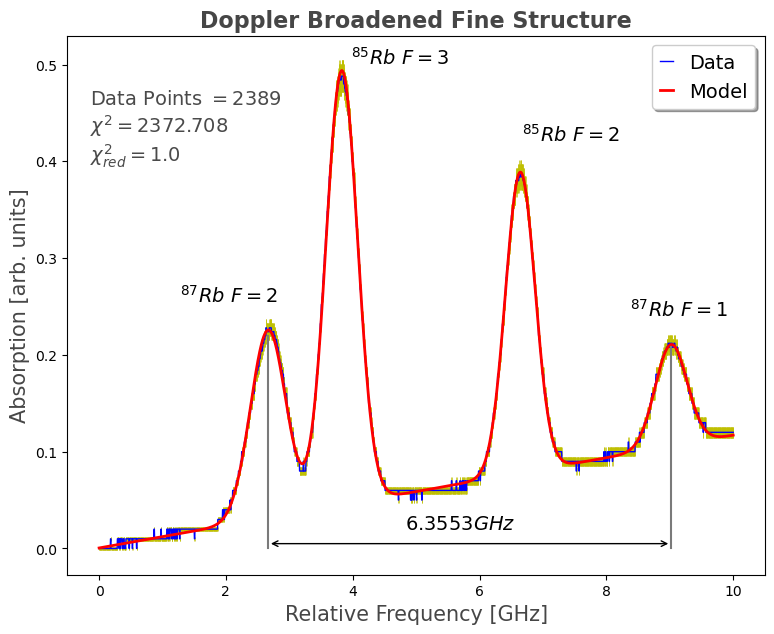

In [9]:
# Set global parameters for the plot using Matplotlib's rcParams
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

#plot data, model and error

# Create a new figure 
plt.figure(figsize=(9, 7))

# Plot the data points with error bars in yellow ('y')
plt.errorbar(x, y, yerr=yerr,fmt='none', ecolor='y', linewidth=0.5 )

# Plot the data points in blue ('b') with a thicker line
plt.plot(x, y, 'b-', linewidth=1)
# Plot the model (result.best_fit) in red ('r') with an even thicker line
plt.plot(x, result.best_fit, 'r-', linewidth=2)

# Set the y-axis label, x-axis label, and plot title with specified fonts and colors
plt.ylabel('Absorption [arb. units]', fontsize=15, color = '#464646')
plt.xlabel('Relative Frequency [GHz]', fontsize=15, color = '#464646')
plt.title('Doppler Broadened Fine Structure',fontsize=16, weight = 'heavy', color = '#464646')

#make annotations for final graph
x1, y1 = [2.66534383,2.66534383], [0, 0.22]
x2, y2 = [9.02062237, 9.02062237], [0, 0.208]
plt.plot(x1, y1, x2, y2, color='#7a7a7a')

# Define a function 'annotate_dim' for annotating dimensions with arrows
def annotate_dim(ax,xyfrom,xyto,text=None):

     ax.annotate("",xyfrom,xyto,arrowprops=dict(arrowstyle='<->'))
    
# Annotate between x1 and x2 with arrows
annotate_dim(plt.gca(),[2.66534383, 0.005],[9.02062237, 0.005])

# Create a legend for the plot with labels 'Data' and 'Model', shadow effect, and position
plt.legend(('Data', 'Model'), shadow=True, loc=('upper right'), handlelength=0.7, fontsize=14)

# Add text annotations to the figure 
# These annotations provide additional information
plt.figtext(0.150, 0.7, 'Data Points $= 2389$ \n$\chi^{2} =  2372.708$ \n$\chi^{2}_{red} = 1.0$', color='#4a4a4a', fontsize = 14)  

#Annotate the peaks corresponding to each Rb isotope
plt.figtext(0.75, 0.48, '$^{87}Rb$ $F=1$', fontsize=14)
plt.figtext(0.63, 0.73, '$^{85}Rb$ $F=2$', fontsize=14)
plt.figtext(0.44, 0.84, '$^{85}Rb$ $F=3$', fontsize=14)
plt.figtext(0.25, 0.50, '$^{87}Rb$ $F=2$', fontsize=14)
plt.figtext(0.5, 0.175, '$6.3553GHz$', fontsize=14)

# Save the figure as 'fine_peaks.png' with a specific DPI
plt.savefig('fine_peaks.png', dpi=300)

#Display the plot
plt.show()

